In [6]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

#AllCommon_PCA.txt  is an output from our CommonUniqueVariants.py
df = pd.read_csv("AllCommon_PCA.txt", sep='\t')
X = df.iloc[:,1:371].values
y = df.iloc[:,0].values
y


array(['sample1_final_filtered_snps_cancer',
       'sample2_final_filtered_snps_cancer',
       'sample3_final_filtered_snps_cancer',
       'sample4_final_filtered_snps_cancer',
       'sample5_final_filtered_snps_cancer',
       'sample6_final_filtered_snps_cancer',
       'sample7_final_filtered_snps_cancer'], dtype=object)

In [7]:
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)
mean_vec = np.mean(X_std, axis=0)
cov_mat = (X_std - mean_vec).T.dot((X_std - mean_vec)) / (X_std.shape[0]-1)
cov_mat

array([[ 1.16666667,  1.16666667, -0.53397501, ..., -0.34321613,
        -0.74302474, -0.69365425],
       [ 1.16666667,  1.16666667, -0.53397501, ..., -0.34321613,
        -0.74302474, -0.69365425],
       [-0.53397501, -0.53397501,  1.16666667, ...,  0.44726323,
         0.63569972,  0.63332131],
       ...,
       [-0.34321613, -0.34321613,  0.44726323, ...,  1.16666667,
         0.87394587,  0.99389897],
       [-0.74302474, -0.74302474,  0.63569972, ...,  0.87394587,
         1.16666667,  1.14732576],
       [-0.69365425, -0.69365425,  0.63332131, ...,  0.99389897,
         1.14732576,  1.16666667]])

In [11]:
eig_vals, eig_vecs = np.linalg.eig(cov_mat)
print("EIGEN_VALUES", eig_vals)
print("EIGEN_VECTORS", eig_vecs)

EIGEN_VALUES [ 1.31398518e+02+0.00000000e+00j  4.54809777e+01+0.00000000e+00j
  3.91830950e+01+0.00000000e+00j  3.49129867e+01+0.00000000e+00j
  2.66032762e+01+0.00000000e+00j  2.34211468e+01+0.00000000e+00j
 -2.20219151e-15+6.74559903e-15j -2.20219151e-15-6.74559903e-15j
 -5.62395636e-15+2.75920957e-15j -5.62395636e-15-2.75920957e-15j
 -5.33573899e-15+5.95341229e-16j -5.33573899e-15-5.95341229e-16j
  5.48625267e-15+0.00000000e+00j  5.00527469e-15+1.38329082e-15j
  5.00527469e-15-1.38329082e-15j  3.92504367e-15+3.49331344e-15j
  3.92504367e-15-3.49331344e-15j -6.00513940e-16+4.97804404e-15j
 -6.00513940e-16-4.97804404e-15j -4.86116984e-15+0.00000000e+00j
  1.63076711e-15+4.53361726e-15j  1.63076711e-15-4.53361726e-15j
  2.50789504e-15+3.86846370e-15j  2.50789504e-15-3.86846370e-15j
 -2.17025508e-15+3.92391274e-15j -2.17025508e-15-3.92391274e-15j
  3.33531336e-15+2.64995711e-15j  3.33531336e-15-2.64995711e-15j
 -2.94517556e-15+2.77409678e-15j -2.94517556e-15-2.77409678e-15j
 -3.55507575

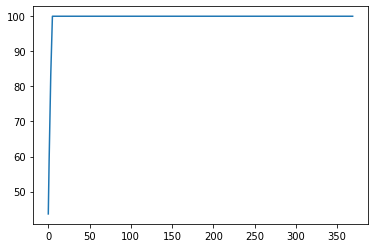

In [17]:
tot = sum(eig_vals)
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

#plt.plot(var_exp) #Individual
plt.plot(cum_var_exp) #Cumulative